In [1]:
!nvidia-smi

Mon Dec  2 23:38:00 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Install Packages

In [3]:
!pip install facenet-pytorch
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 79.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 85.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 68.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 12.6 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.5.1+cu121 requires torch==2.5.1, but you have torch 2.2.2 which is incompatible.


In [4]:
!pip install fastcore -U


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.7/83.7 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: fastcore
    Found existing installation: fastcore 1.7.20
    Uninstalling fastcore-1.7.20:
      Successfully uninstalled fastcore-1.7.20


## Import Packages

In [3]:
#Import necessary libraries
from facenet_pytorch import MTCNN, InceptionResnetV1, fixed_image_standardization, training
import torch
from torch.utils.data import DataLoader, SubsetRandomSampler
from torch import optim
from torch.optim.lr_scheduler import MultiStepLR
from torch.utils.tensorboard import SummaryWriter
from torchvision import datasets, transforms
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

## Data loading in the pytorch code for our dataset

In [4]:
# Define data directory and parameters
data_dir = '/content/drive/MyDrive/Input/train_data'

batch_size = 8
epochs = 8
workers = 0 if os.name == 'nt' else 8

In [5]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))

Running on device: cuda:0


### Data Loading - Preprocess dataset with MTCNN (face detection and alignment)

In [6]:
!rm -rf /content/drive/MyDrive/input/train_data_cropped

In [7]:
IMAGE_SIZE = 128

In [8]:
mtcnn = MTCNN(
    image_size=IMAGE_SIZE,
    margin=0,
    min_face_size=8,
    thresholds=[0.3, 0.4, 0.5],
    factor=0.6,
    device=device
)

In [9]:
dataset = datasets.ImageFolder(data_dir, transform=transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)))
dataset.samples = [
    (p, p.replace(data_dir, data_dir + '_cropped'))
        for p, _ in dataset.samples
]
workers = 2 if os.name == 'nt' else 8

# Initialize data loader for MTCNN processing
loader = DataLoader(
    dataset,
    num_workers=workers,
    batch_size=batch_size,
    collate_fn=training.collate_pil
)

mtcnn = MTCNN(
    image_size=IMAGE_SIZE,
    margin=0,
    min_face_size=8,
    thresholds=[0.3, 0.4, 0.5],
    factor=0.6,
    device=device
)

# Run MTCNN on each batch to detect and crop faces
for i, (x, y) in enumerate(loader):
    try:
        mtcnn(x, save_path=y)
    except ValueError as e:
        if "setting an array element with a sequence" in str(e):
            print(f"Skipping batch {i + 1} - no face detected.")
            continue
    except Exception as e:
        print(f"Error in batch {i + 1}: {e}")
        continue
    print(f'Batch {i + 1} of {len(loader)} processed', end='\r')


del mtcnn

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Skipping batch 3 - no face detected.
Skipping batch 16 - no face detected.
Skipping batch 17 - no face detected.
Skipping batch 18 - no face detected.


## Partition of dataset into 80% training, 10% validation, and 10% test.

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


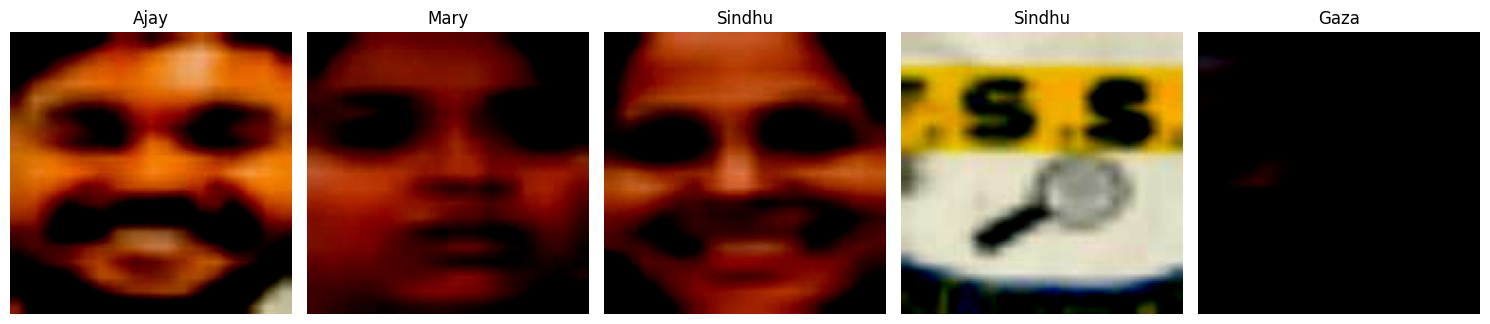

Sample Index: 15
Label (Class Index): 1
Label (Class Name): Ajay
Image Shape: torch.Size([3, 128, 128])
Image Data (First 5 Pixels): tensor([-0.7148, -0.7070, -0.6914, -0.6914, -0.6992])


In [10]:
trans = transforms.Compose([
    np.float32,
    transforms.ToTensor(),
    fixed_image_standardization
])

dataset = datasets.ImageFolder(data_dir + '_cropped', transform=trans)
dataset.idx_to_class = {i:c for c, i in dataset.class_to_idx.items()}
idx_to_class =  {i:c for c, i in dataset.class_to_idx.items()}

# Partition dataset
img_inds = np.arange(len(dataset))
np.random.shuffle(img_inds)

train_inds = img_inds[:int(0.8 * len(img_inds))]
val_inds = img_inds[int(0.8 * len(img_inds)):int(0.9 * len(img_inds))]
test_inds = img_inds[int(0.9 * len(img_inds)):]

batch_size = 8  # Update based on your setup
workers = 4      # Number of data loader workers

train_loader = DataLoader(
    dataset,
    num_workers=workers,
    batch_size=batch_size,
    sampler=SubsetRandomSampler(train_inds)
)

val_loader = DataLoader(
    dataset,
    num_workers=workers,
    batch_size=batch_size,
    sampler=SubsetRandomSampler(val_inds)
)

test_loader = DataLoader(
    dataset,
    num_workers=workers,
    batch_size=batch_size,
    sampler=SubsetRandomSampler(test_inds)
)

# Visualize sample images with annotations
def visualize_samples(dataset, idx_to_class, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
    for i, ax in enumerate(axes):
        img, label = dataset[train_inds[i]]  # Use training set samples
        ax.imshow(img.permute(1, 2, 0))  # Convert CHW to HWC for display
        ax.set_title(idx_to_class[label])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

visualize_samples(dataset, idx_to_class)

# Display data structure of one sample
def display_sample_structure(dataset, sample_idx):
    img, label = dataset[sample_idx]
    print(f"Sample Index: {sample_idx}")
    print(f"Label (Class Index): {label}")
    print(f"Label (Class Name): {dataset.idx_to_class[label]}")
    print(f"Image Shape: {img.shape}")
    print(f"Image Data (First 5 Pixels): {img.flatten()[:5]}")

# Display the structure of one sample from the training set
display_sample_structure(dataset, train_inds[0])


### Loading parameters of a pretrained model and changing last few layers

In [11]:
#Define and modify model architecture to match number of classes
resnet = InceptionResnetV1(
    classify=True,
    pretrained='vggface2',
    num_classes=len(dataset.class_to_idx)
).to(device)

  0%|          | 0.00/107M [00:00<?, ?B/s]

In [12]:
resnet

InceptionResnetV1(
  (conv2d_1a): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_2a): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_2b): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (maxpool_3a): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2d_3b): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_4a): 

## Loss and Metric

In [13]:
#Define loss function and metrics
loss_fn = torch.nn.CrossEntropyLoss()
metrics = {
    'fps': training.BatchTimer(),
    'acc': training.accuracy
}

In [14]:
def evaluate(loader, model, loss_fn, device):
    """
    Evaluate the model performance on a given dataset loader.
    """
    model.eval()  # Set the model to evaluation mode
    total_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    with torch.no_grad():  # Disable gradient computation
        for images, targets in loader:
            images, targets = images.to(device), targets.to(device)

            # Forward pass
            outputs = model(images)
            loss = loss_fn(outputs, targets)

            # Compute total loss
            total_loss += loss.item() * images.size(0)

            # Compute accuracy
            _, predicted = outputs.max(1)
            correct_predictions += (predicted == targets).sum().item()
            total_samples += targets.size(0)

    # Average loss and accuracy
    avg_loss = total_loss / total_samples
    accuracy = correct_predictions / total_samples
    return avg_loss, accuracy

# Get pre-training performance
pre_train_loss, pre_train_acc = evaluate(train_loader, resnet, loss_fn, device)
pre_val_loss, pre_val_acc = evaluate(val_loader, resnet, loss_fn, device)

print(f"Pre-training Training Loss: {pre_train_loss:.4f}, Accuracy: {pre_train_acc:.2f}")
print(f"Pre-training Validation Loss: {pre_val_loss:.4f}, Accuracy: {pre_val_acc:.2f}")


Pre-training Training Loss: 2.7975, Accuracy: 0.05
Pre-training Validation Loss: 2.6376, Accuracy: 0.00


## Optimization and Scheduler

In [15]:
optimizer = optim.Adam(resnet.parameters(), lr=0.001)
scheduler = MultiStepLR(optimizer, [5, 10])

## Model Training

In [16]:
epochs = 8

In [17]:
# Freeze early layers
for name, param in resnet.named_parameters():
    if 'conv2d' in name or 'repeat' in name:
        param.requires_grad = False

# Unfreeze deeper layers and classification head
for name, param in resnet.named_parameters():
    if 'block8' in name or 'last_linear' in name or 'logits' in name:
        param.requires_grad = True


#Perform hyperparameter tuning

best_loss = np.inf

best_lr = None
best_weight_decay = None

for lr in [ 0.001, 0.01, 0.1]:
    for weight_decay in [0.0001, 0.001, 0.01]:

        resnet = InceptionResnetV1(
            classify=True,
            pretrained='vggface2',
            num_classes=len(dataset.class_to_idx)
        ).to(device)

        optimizer = optim.Adam(resnet.parameters(), lr=lr, weight_decay=weight_decay)
        scheduler = MultiStepLR(optimizer, [5, 10])

        writer = SummaryWriter()
        writer.iteration, writer.interval = 0, 10

        resnet.eval()
        training.pass_epoch(
            resnet, loss_fn, val_loader,
            batch_metrics=metrics, show_running=True, device=device,
            writer=writer
        )

        for epoch in range(epochs):
            print('\nEpoch {}/{}'.format(epoch + 1, epochs))
            print('-' * 10)

            images, targets = next(iter(train_loader))

            resnet.train()
            training.pass_epoch(
                resnet, loss_fn, train_loader, optimizer, scheduler,
                batch_metrics=metrics, show_running=True, device=device,
                writer=writer
            )

            resnet.eval()
            valid_results = training.pass_epoch(
                resnet, loss_fn, val_loader,
                batch_metrics=metrics, show_running=True, device=device,
                writer=writer
            )

            valid_loss = valid_results[0].item()

            if valid_loss < best_loss:
                best_loss = valid_loss

                best_lr = lr
                best_weight_decay = weight_decay

        writer.close()

Valid |     3/3    | loss:    3.0680 | fps:   70.6540 | acc:    0.0000   

Epoch 1/8
----------
Train |    17/17   | loss:    2.6919 | fps:   67.1056 | acc:    0.2279   
Valid |     3/3    | loss:  301.3103 | fps:   98.8534 | acc:    0.0417   

Epoch 2/8
----------
Train |    17/17   | loss:    2.0670 | fps:   90.6986 | acc:    0.3824   
Valid |     3/3    | loss:    3.5020 | fps:  100.7043 | acc:    0.1667   

Epoch 3/8
----------
Train |    17/17   | loss:    1.8768 | fps:   92.3460 | acc:    0.3971   
Valid |     3/3    | loss:    3.4448 | fps:   92.8217 | acc:    0.3333   

Epoch 4/8
----------
Train |    17/17   | loss:    1.3641 | fps:   94.6723 | acc:    0.5662   
Valid |     3/3    | loss:    4.6373 | fps:  103.2991 | acc:    0.3333   

Epoch 5/8
----------
Train |    17/17   | loss:    1.3962 | fps:   83.9162 | acc:    0.6250   
Valid |     3/3    | loss:    2.1875 | fps:   67.5466 | acc:    0.3750   

Epoch 6/8
----------
Train |    17/17   | loss:    0.8567 | fps:   57.3276 

In [18]:
best_lr, best_weight_decay

(0.001, 0.001)

In [19]:
print("Best learning rate: ", best_lr)
print("Best weight decay: ", best_weight_decay)

Best learning rate:  0.001
Best weight decay:  0.001



Epoch 1/8
----------


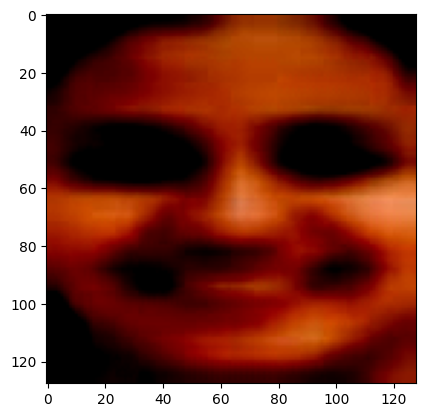

Target :  tensor(4)
Train |    17/17   | loss:    2.3770 | fps:   87.2361 | acc:    0.2721   
Valid |     3/3    | loss:    4.4422 | fps:   99.6839 | acc:    0.2083   

Epoch 2/8
----------


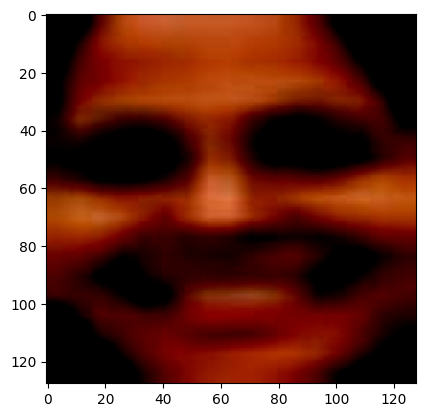

Target :  tensor(11)
Train |    17/17   | loss:    1.7041 | fps:   65.2825 | acc:    0.5147   
Valid |     3/3    | loss:    1.4709 | fps:   54.1216 | acc:    0.6250   

Epoch 3/8
----------


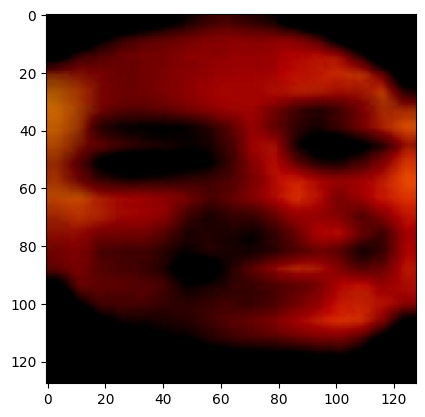

Target :  tensor(7)
Train |    17/17   | loss:    1.2545 | fps:   92.5501 | acc:    0.5735   
Valid |     3/3    | loss:    1.0758 | fps:   99.5391 | acc:    0.5833   

Epoch 4/8
----------


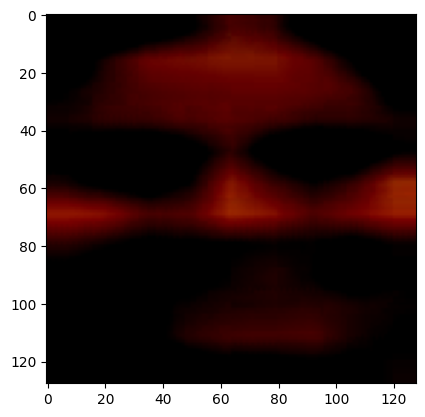

Target :  tensor(4)
Train |    17/17   | loss:    0.8464 | fps:   81.3247 | acc:    0.7206   
Valid |     3/3    | loss:    1.3260 | fps:   74.0734 | acc:    0.4167   

Epoch 5/8
----------


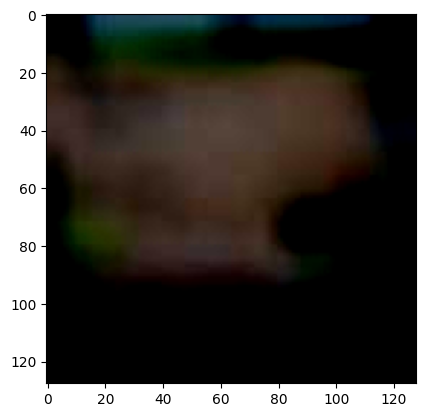

Target :  tensor(9)
Train |    17/17   | loss:    1.0007 | fps:   58.1215 | acc:    0.6838   
Valid |     3/3    | loss:    1.3515 | fps:   89.2061 | acc:    0.6250   

Epoch 6/8
----------


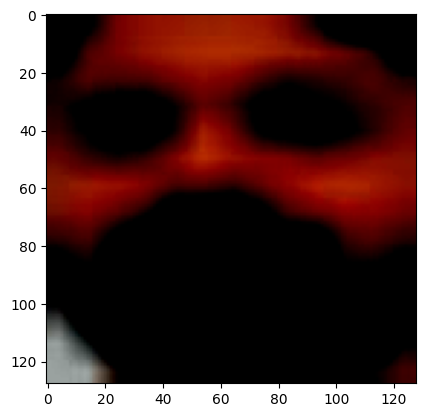

Target :  tensor(5)
Train |    17/17   | loss:    0.6389 | fps:   56.2766 | acc:    0.7941   
Valid |     3/3    | loss:    2.0725 | fps:   95.7548 | acc:    0.4167   

Epoch 7/8
----------


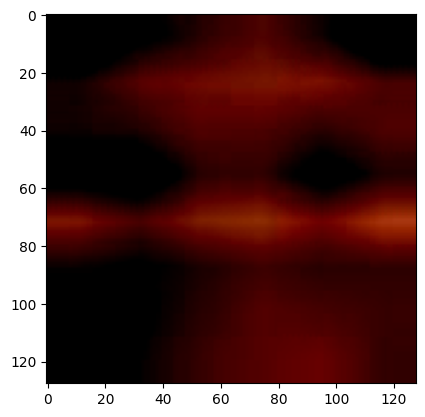

Target :  tensor(4)
Train |    17/17   | loss:    0.5300 | fps:   87.7860 | acc:    0.8603   
Valid |     3/3    | loss:    0.9748 | fps:  104.0208 | acc:    0.7917   

Epoch 8/8
----------


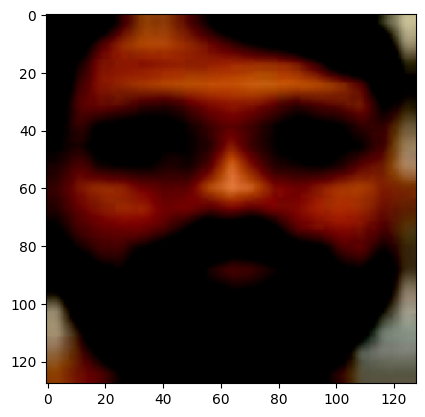

Target :  tensor(5)
Train |    17/17   | loss:    0.3519 | fps:   93.7078 | acc:    0.8529   
Valid |     3/3    | loss:    1.0687 | fps:  103.7090 | acc:    0.8750   


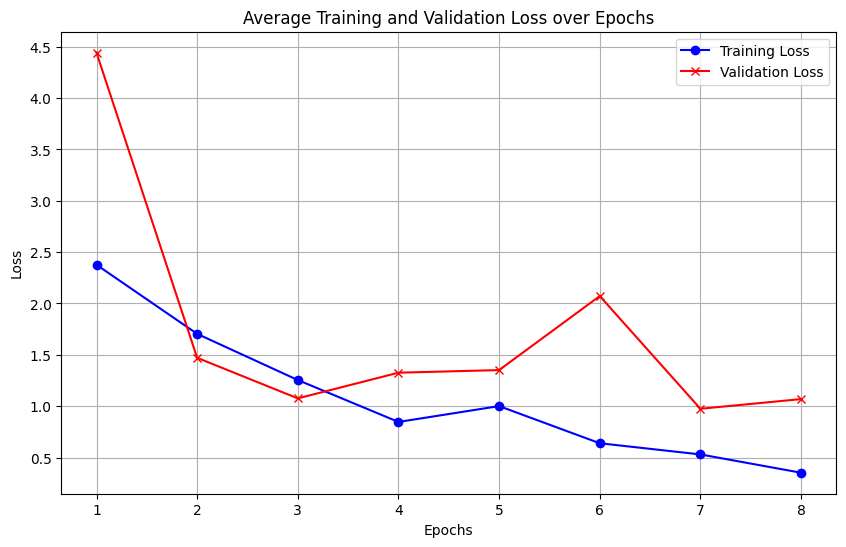

In [20]:
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

resnet = InceptionResnetV1(
    classify=True,
    pretrained='vggface2',
    num_classes=len(dataset.class_to_idx)
).to(device)

optimizer = optim.Adam(resnet.parameters(), lr=best_lr, weight_decay=best_weight_decay)
scheduler = MultiStepLR(optimizer, [5, 10])

writer = SummaryWriter()
writer.iteration, writer.interval = 0, 10


for epoch in range(epochs):
    print('\nEpoch {}/{}'.format(epoch + 1, epochs))
    print('-' * 10)

    images, targets = next(iter(train_loader))
    sample_image = images[0].permute(1, 2, 0).cpu().numpy()
    plt.imshow(sample_image)
    plt.show()
    print("Target : ", targets[0])

    resnet.train()
    train_results = training.pass_epoch(
        resnet, loss_fn, train_loader, optimizer, scheduler,
        batch_metrics=metrics, show_running=True, device=device,
        writer=writer
    )
    train_losses.append(train_results[0].item())
    train_accuracies.append(train_results[1]['acc'].item())

    resnet.eval()
    valid_results = training.pass_epoch(
        resnet, loss_fn, val_loader,
        batch_metrics=metrics, show_running=True, device=device,
        writer=writer
    )
    val_losses.append(valid_results[0].item())
    val_accuracies.append(valid_results[1]['acc'].item())

# Plotting training and validation loss
epochs_range = range(1, epochs + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs_range, train_losses, label="Training Loss", color='blue', marker='o')
plt.plot(epochs_range, val_losses, label="Validation Loss", color='red', marker='x')

plt.title("Average Training and Validation Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.grid(True)

plt.show()

In [21]:
# Save the trained model
torch.save(resnet.state_dict(), 'resnet_trained_model.pth')
print("Model saved as 'resnet_trained_model.pth'")

Model saved as 'resnet_trained_model.pth'


In [22]:
print("\nPost Training Summary:")
print(f"Final Training Loss: {train_losses[-1]:.4f}, Final Training Accuracy: {train_accuracies[-1]:.2f}")
print(f"Final Validation Loss: {val_losses[-1]:.4f}, Final Validation Accuracy: {val_accuracies[-1]:.2f}")


Post Training Summary:
Final Training Loss: 0.3519, Final Training Accuracy: 0.85
Final Validation Loss: 1.0687, Final Validation Accuracy: 0.88


## Model Testing

### Evaluate on the test dataset

In [23]:
# Test the model on the test dataset
resnet.eval()
test_results = training.pass_epoch(
    resnet, loss_fn, test_loader,
    batch_metrics=metrics, show_running=False, device=device,
)

Valid |     3/3    | loss:    0.0534 | fps:   23.4088 | acc:    1.0000   


In [24]:
test_acc = test_results[1]['acc'].item()*100
test_loss = test_results[0].item()

print(f"Test Loss: {test_loss:.4f}, Accuracy: {test_acc:.2f}%")


Test Loss: 1.0548, Accuracy: 66.67%


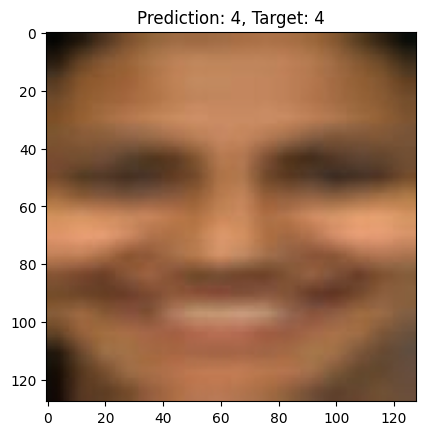

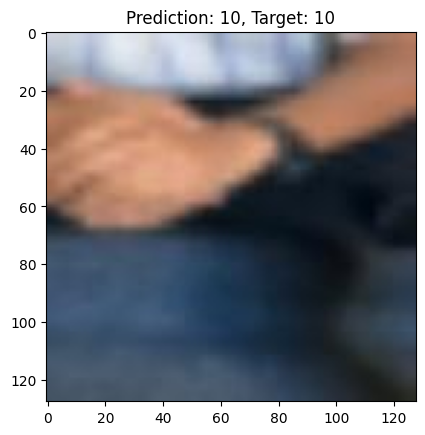

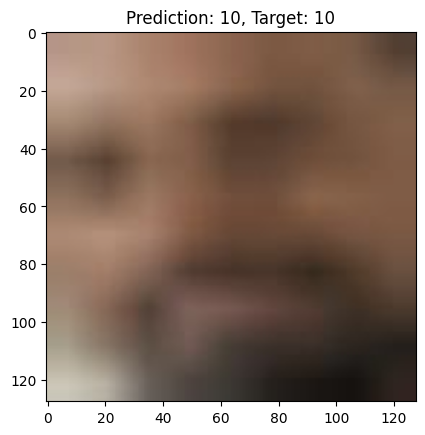

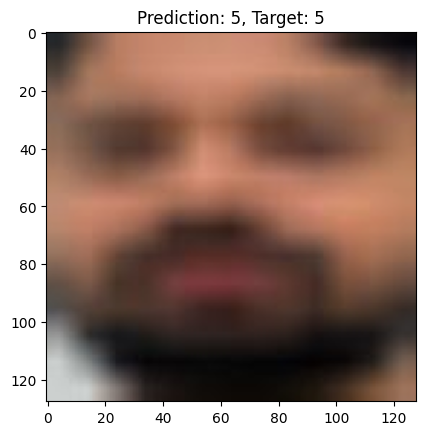

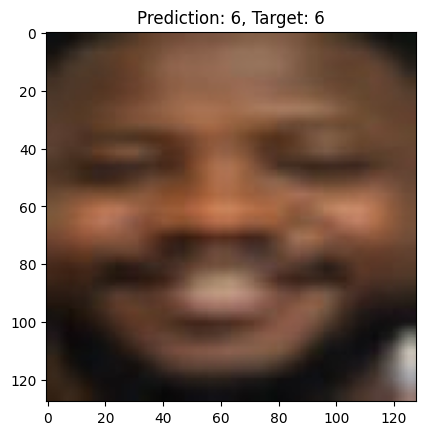

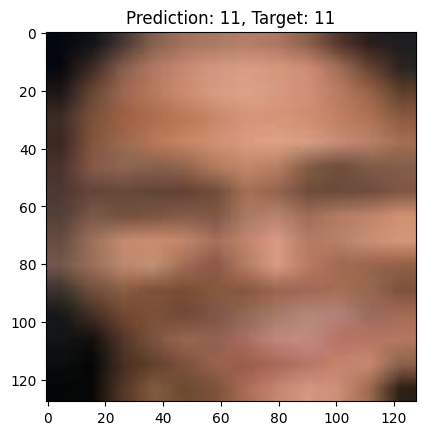

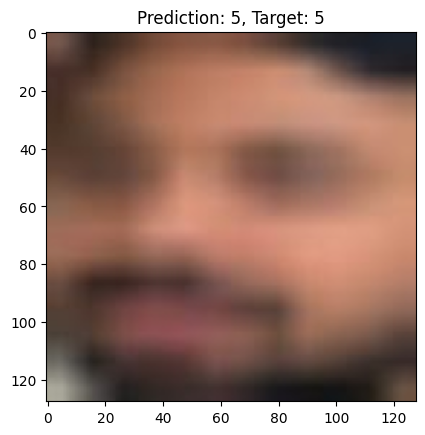

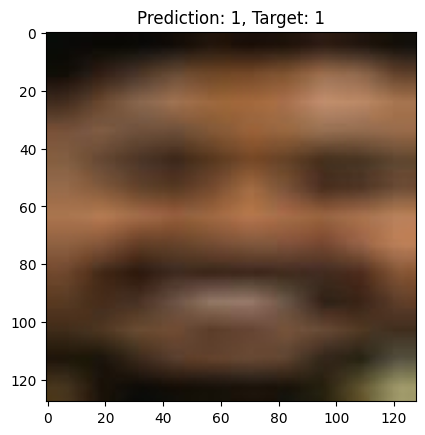

In [25]:
#Visualize the 1st sample of each minibatch of size 8 and its prediction
resnet.eval()
with torch.no_grad():
    for i, (images, targets) in enumerate(train_loader):
        images, targets = images.to(device), targets.to(device)
        outputs = resnet(images)
        predictions = outputs.argmax(dim=1)

        # Display the first sample of each batch
        img = images[0].cpu().permute(1, 2, 0).numpy() * 0.5 + 0.5
        plt.imshow(img)
        plt.title(f"Prediction: {predictions[0].item()}, Target: {targets[0].item()}")
        plt.show()

        if i == 7:
            break


In [ ]:
import torch
import gradio as gr
from torchvision import transforms
from PIL import Image

# Define the transformation for input images (same as used in training)
transform = transforms.Compose([
    transforms.Resize((160, 160)),  # Resize to match the input size of the model
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize
])

# Load the saved model (replace with your model path)
resnet = InceptionResnetV1(classify=True, num_classes=12)
resnet.load_state_dict(torch.load('resnet_trained_model.pth', map_location=torch.device('cpu')))
resnet.eval()

# Class labels from your dataset
class_labels = list(dataset.class_to_idx.keys())  # Replace with your class-to-index mapping

# Prediction function for Gradio
def predict(image):
    try:
        # Preprocess the input image
        image = transform(image).unsqueeze(0)  # Add batch dimension

        # Perform inference
        with torch.no_grad():
            outputs = resnet(image)  # Raw logits
            probabilities = torch.nn.functional.softmax(outputs, dim=1).squeeze()

        # Get the top prediction
        top_prob, top_class = torch.max(probabilities, dim=0)
        predicted_label = class_labels[top_class.item()]

        # Return probabilities for all classes
        return {class_labels[i]: probabilities[i].item() for i in range(len(class_labels))}

    except Exception as e:
        return {"Error": str(e)}

# Define the Gradio interface
interface = gr.Interface(
    fn=predict,
    inputs=gr.Image(type="pil"),  # Input: Image
    outputs=gr.Label(num_top_classes=3),  # Output: Top 3 predicted classes with probabilities
    title="Image Classifier",
    description="Upload an image, and the model will predict the class."
)

# Launch the Gradio app
interface.launch(debug=True)


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://1eef4ce737f4138613.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
